<a href="https://colab.research.google.com/github/PrashantShrivastava1612/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title - Seoul Bike Sharing Demand Prediction**

**Project Type** - Regression

**Contribution** - Individual


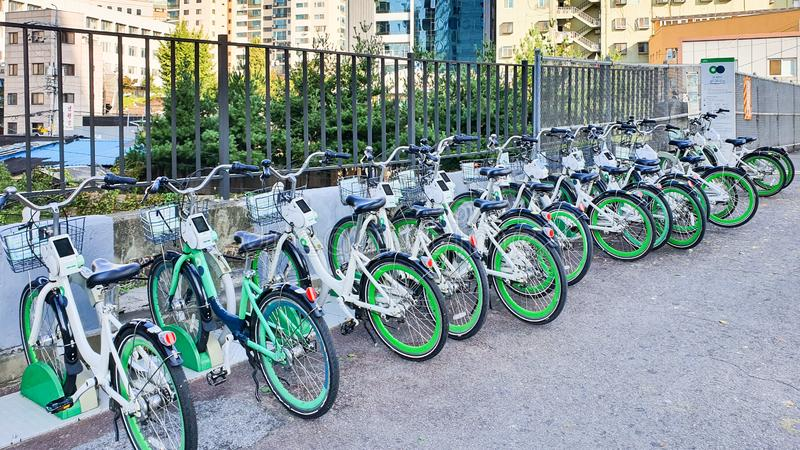

#**Project Summary** -

This Project aims to predict the demand for bike sharing services in Seoul, South Korea. Bike sharing services have become increasingly popular in recent years, providing an affordable and environmental friendly way to get around the city. However, bike sharing companies often struggle with balancing their inventory of bikes at each station, as demand for bikes can fluctuate greatly throughout the day.

To address this issue, the Seoul Metropolitan Government has provided data on the city's bike sharing system, including information on weather, time of day, and the number of bikes rented. This data has been used to build a machine learning model that predicts the number of bikes that will be rented at any given time.

The project was divided into several stages. The first stage involved data inspection which included looking for missing values and duplicate values. The next stage involved exploratory data analysis, where trends and patterns in the data were identified. Distribution of data was also studied. Hypothesis Testing was performed on two hypothesis. After this Feature selection and Preprocessing of data was done by converting categorical variables into numerical ones, splitting data and data scaling .

After this, various machine learning algorithms were tested on the data, including linear regression, lasso regression, decision trees, and random forests and XGBoost. The performance of each model was evaluated using metrics such as root mean squared error and mean absolute error and R squared. The XGBoost model was found to be the most accurate, with an R 2 score of 0.87.

Overall, the Seoul Bike Sharing Demand Prediction Project demonstrates the power of machine learning in predicting demand for bike sharing services. By accurately predicting demand, bike sharing companies can optimize their inventory and provide better service to their customers.

#**Github Link**

[Bike Sharing Demand Prediction](https://github.com/PrashantShrivastava1612/Bike-Sharing-Demand-Prediction)

#**Problem Description**

###**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

#**Business Context**

 Bike sharing has become an increasingly popular mode of transportation in many urban areas around the world due to its convenience and low cost. In Seoul, the bike sharing service has been widely adopted, with over 20,000 bikes and 1,600 stations available for public use.

The demand for bike sharing services is affected by various factors such as weather, day of the week, time of day, and special events. By accurately predicting the demand for bike sharing, companies can optimize their operations and provide better service to customers. For example, they can adjust the number of bikes available at each station, schedule maintenance and repair activities, and plan marketing campaigns to attract more users.

In addition to improving the bike sharing service, accurate demand prediction can also help city planners and policymakers to make informed decisions about infrastructure investments, traffic management, and environmental sustainability. By understanding the patterns of bike usage, they can design better bike lanes and parking facilities, reduce traffic congestion and air pollution, and promote healthy and sustainable modes of transportation.

Overall, the business context of Seoul Bike Sharing Demand Prediction is to improve the efficiency, convenience, and sustainability of urban transportation by leveraging data analytics and machine learning techniques.

#**Let's Begin**

## **Know Your Data**

**Import Libraries**

In [318]:
# importing libraries for analysis
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing libraries for hypothesis testing
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest

#importing libraries for preprocessing and ML Implementation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

**Dataset Loading**

In [319]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [320]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Capstone Project/Bike Sharing Demand Prediction/SeoulBikeData.csv'
data = pd. read_csv(path, encoding = "ISO-8859-1")

**Dataset First View**

In [321]:
# Dataset First Look
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [322]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Dataset Rows and Columns Count**

In [323]:
# Dataset Rows & Columns count
data.shape

(8760, 14)

**Dataset Information**

In [324]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Missing Values/ Null Values**

In [325]:
#null values in dataset
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Duplicate Values**

In [326]:
#duplicate values count
data.duplicated().sum()

0

Our dataset contains 8760 rows and 14 columns.

No null value is present in the dataset.

No duplicate observations were present in the dataset.

## **Understanding Variables**

In [327]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###**Variable Description**



**Date :** year-month-day

**Rented Bike count -** Count of bikes rented at each hour

**Hour -** Hour of the day

**Temperature-** Temperature in Celsius

**Humidity -** Humidity in %

**Windspeed -** Windspeed in m/s

**Visibility -**  Visible distance in multiple of 10m

**Dew point temperature -** Celsius

**Solar radiation -** Radiation of sun in MJ/m2

**Rainfall -** Rainfall in mm

**Snowfall -** Snowfall in cm

**Seasons -** Winter, Spring, Summer, Autumn

**Holiday -** Holiday/No holiday

**Functional Day -** NoFunc(Non Functional Hours), Fun(Functional hours)

In [328]:
# Dataset Describe
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## **Data Wrangling**

Checking unique values in columns

In [329]:
data.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [330]:
data['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [331]:
data['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [332]:
#Defining a function to convert string attributes Funtioning to numerical values
def functioning(val):
  """ this function converts yes no to binary"""
  if val=='Yes':
    return 1
  else:
    return 0

In [333]:
#Defining a function to convert string attributes of Holiday to numerical values
def holiday( val):
  """ converts holiday value to binary"""
  if val=='No Holiday':
    return 0
  else:
    return 1

In [334]:
#apply above defined functions to respective columns
data['Functioning Day'] = data['Functioning Day'].apply(functioning)
data['Holiday'] = data['Holiday'].apply(holiday)

In [335]:
#converting date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y", infer_datetime_format='%d%m%Y', exact=True)

In [336]:
# split day of week, month and year in three column
data['day_of_week'] = data['Date'].dt.day_name() # extract week name from Date column
data["month"] = data['Date'].dt.month_name()   # extract month name from Date column
data["year"] = data['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [337]:
#new column that indicates whether each row corresponds to a weekday or a weekend:
data['weekday'] = data['Date'].dt.weekday < 5

* Checked for unique values in certain columns

* Converted "Functionioning Day" column values to binary values.

* Converted "Holiday" column values to binary values.

* Converted "Date" column to Datetime format.

* Extracted Day of week, Month, Year from date to make separate features.

* Introduced a column "weekday" that represents whether there was a weekend or weekday on respective date.

## **Data Exploration and Visualisation**

###**Univariate Analysis**

**Disribution of target variable**

<Axes: >

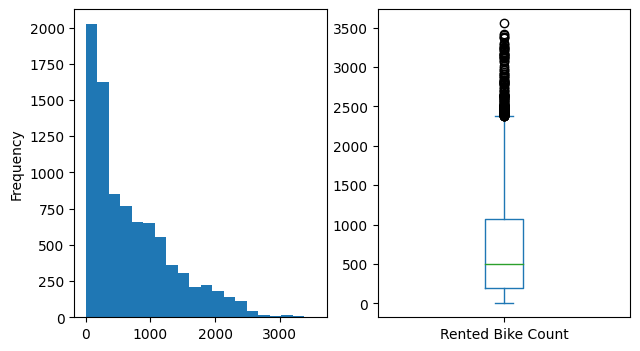

In [338]:
#understanding distribution of target variable
fig = plt.figure(figsize=(15, 4))

df1 = data['Rented Bike Count']

ax1 = fig.add_subplot(141)
df1.plot.hist(ax=ax1, bins=20)

df2 = data['Rented Bike Count']

ax2 = fig.add_subplot(142)
df2.plot.box(ax=ax2)

* Dependent variable distribution is slightly right skewed.
* Maximum frequency of rented bike count were of values less than 500
* Median lies around 500 and 75 percentile lies around 1000.

**Distribution of Independent Variables**

In [339]:
#selecting numeric column and assigning them to variable
numerical_features = [ ('Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)'),('Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)')]


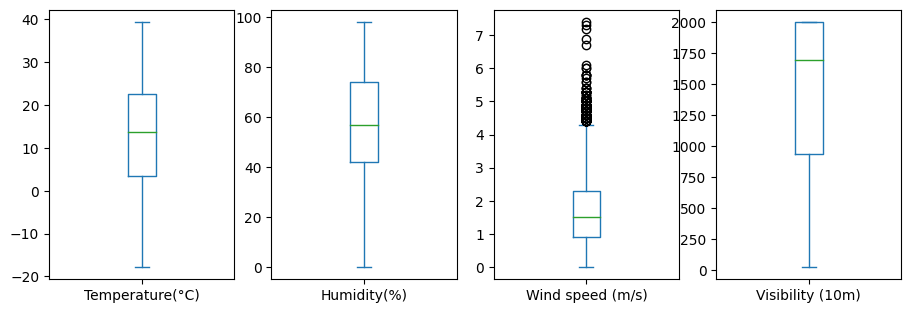

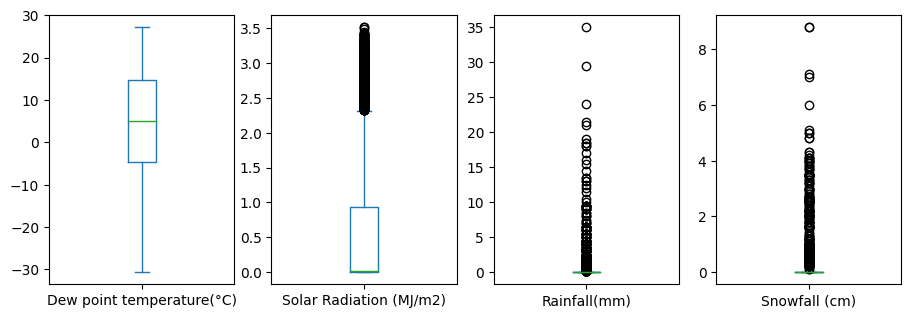

In [340]:
# plotting boxplot of numerical columns
for i,j,k,l in numerical_features:
  fig = plt.figure(figsize=(11,3.5))

  df1 = data[i]

  ax1 = fig.add_subplot(141)
  df1.plot.box(ax=ax1)

  df2 = data[j]

  ax2 = fig.add_subplot(142)
  df2.plot.box(ax=ax2)

  df3 = data[k]

  ax3 = fig.add_subplot(143)
  df3.plot.box(ax=ax3)

  df4 = data[l]

  ax4 = fig.add_subplot(144)
  df4.plot.box(ax=ax4)

  plt.show()


* Columns such as Temperature, Humidity, Visibility, Dew point Temperature are free from outliers.

* Outliers can be seen in columns such as wind speed, solar radiation, rainfall and snowfall but these outliers are rather the occasional variations in whether therefore they serve as important data points and should be retained in the dataset as removing them would result in loss of valueable data.

In [341]:
#flattening numerical_features list
from pandas.core.common import flatten
numerical_features = list(flatten(numerical_features))

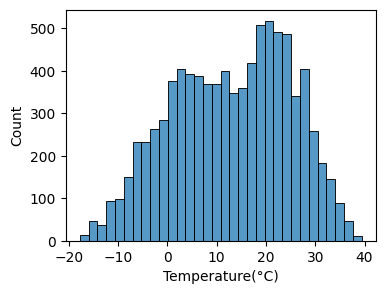

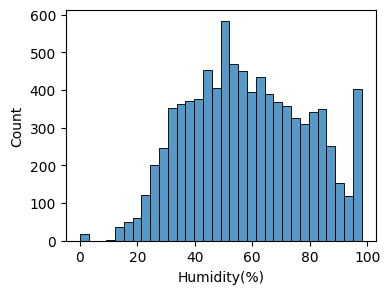

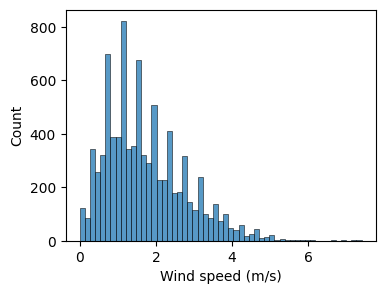

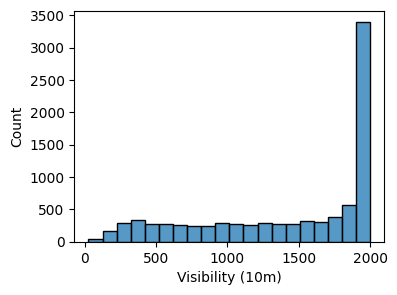

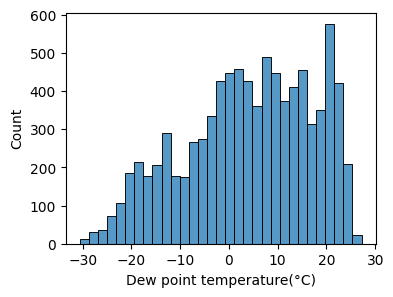

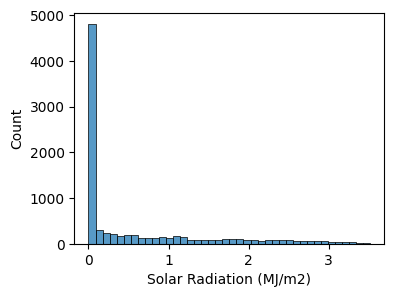

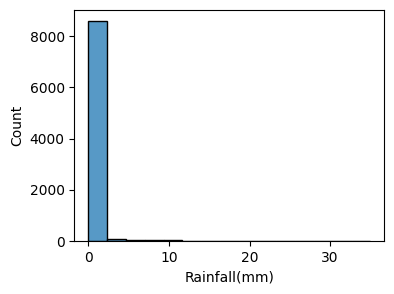

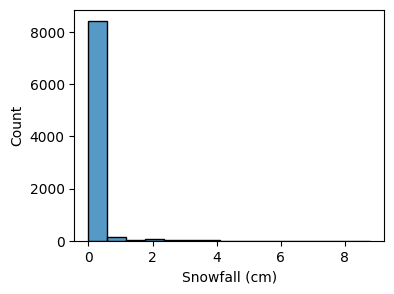

In [525]:
#plotting histplot for various features using for loop
for i in numerical_features:
  plt.figure(figsize=(4,3))
  sns.histplot(x=data[i])
  plt.show()

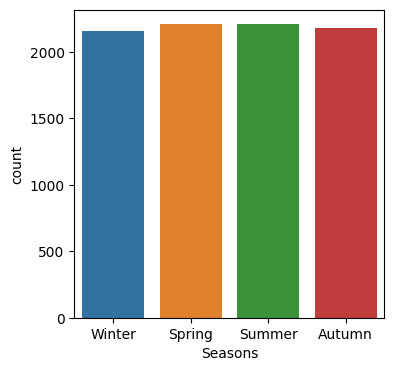

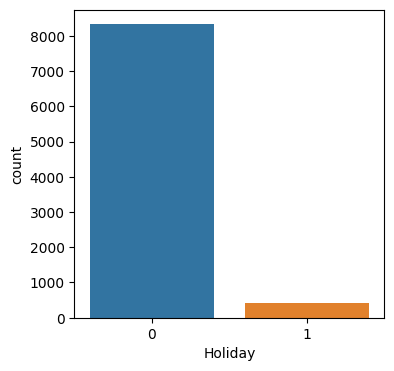

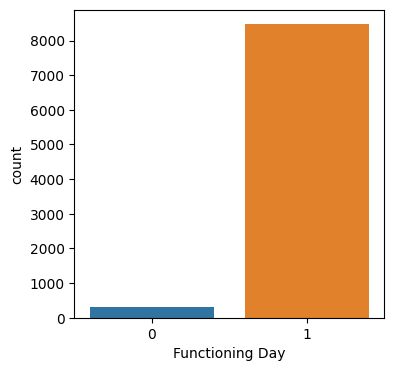

In [343]:
#plotting barchart for categorical columns
categorical=['Seasons','Holiday', 'Functioning Day']
for i in categorical:
  plt.figure(figsize=(4,4))
  sns.countplot(data=data, x=i)
  plt.show()

* Observations for all four seasons are fairly equal.
* Observations for Holidays are very less compared to Non- Holiday observations.
* Observations for Functioning days are very large and Non functioning day are very less.

###**Bivariate Analysis**

**Analysis of Numeroical variables with respect to Dependent Variable.**

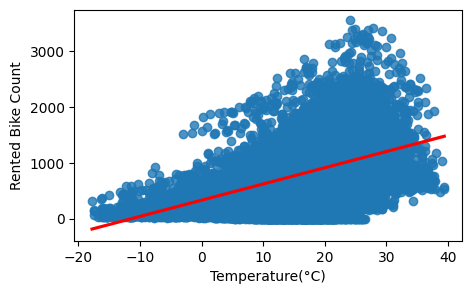

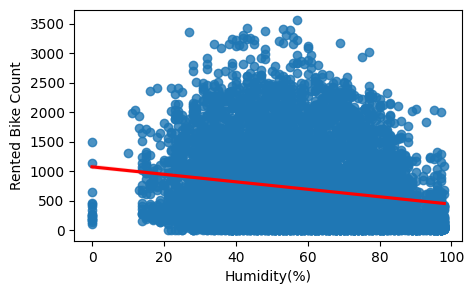

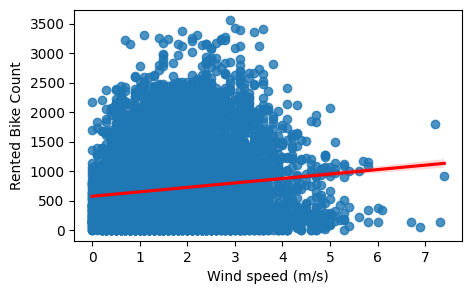

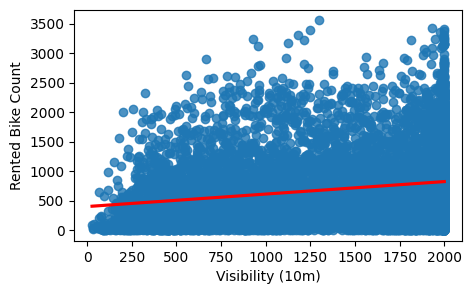

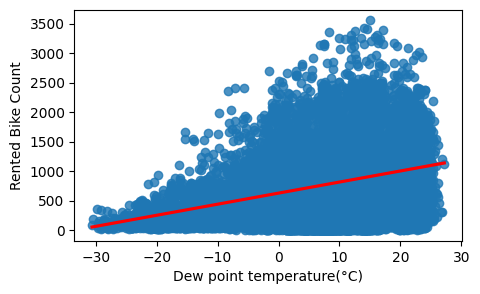

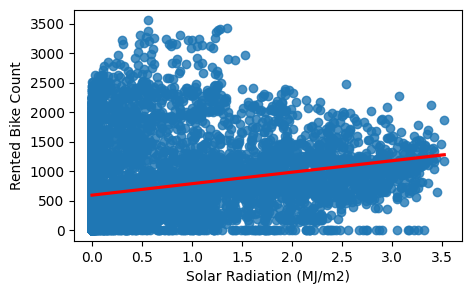

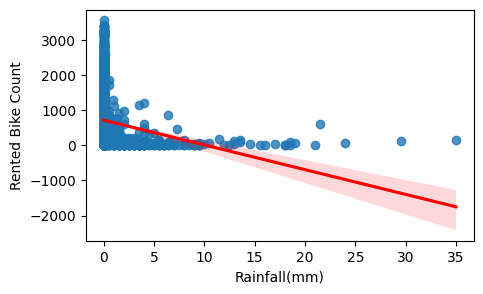

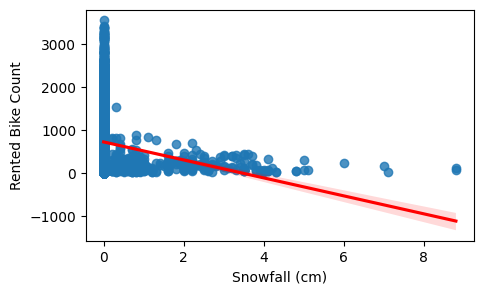

In [524]:
#Understanding relationship of variables with target variable using regplot
for i in numerical_features:
  plt.figure(figsize=(5,3))
  sns.regplot(data, x=i, y='Rented Bike Count',line_kws={"color": "red"})
  plt.show()

**Observations**
* General trend is as the temperature increases number of bike rentals also increases.
* Bike rental count decreases with increase in Humidity.
* Bike Rentals are fairly invariable of Wind speed but a faint increase can be seen in the trendline.
* Bike Rentals mildly increases with increase in Visibility
* Sharp increase can be noted with increase in Dew Point temperature.
* On an average, Rented bike counts increases with increase in Solar Raiation.
* Decline in Bike Rentals is seen with increase in Rainfall.
* Decline in Bike Rentals is seen with increase in Snowfall.

<Axes: xlabel='weekday', ylabel='Rented Bike Count'>

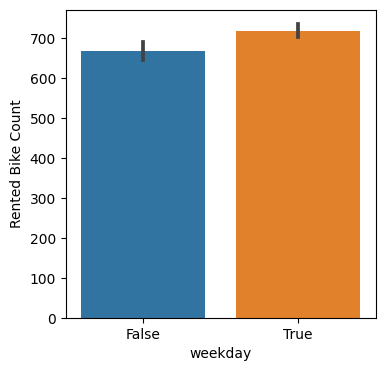

In [345]:
# distribution of bike rentals for weekdays and weekends
plt.figure(figsize=(4,4))
sns.barplot(x='weekday', y='Rented Bike Count', data=data)

Mean Bike Rentals on weekdays are a little higher than on weekends. This might be due to the usage of Bike Rentals for commuting to office.

In [346]:
#dataframe for mean rentals vs holiday status
holiday_rent = pd.DataFrame(data.groupby('Holiday').agg({'Rented Bike Count':'mean'})).reset_index()
#dataframe for mean rentals vs different seasons
season_rent = pd.DataFrame(data.groupby('Seasons').agg({'Rented Bike Count':'mean'})).reset_index()

Text(0.5, 1.0, 'Holiday vs Mean Rented Bike count')

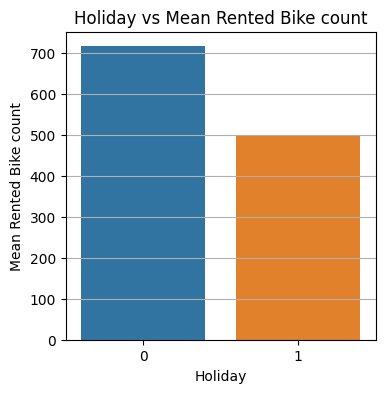

In [347]:
#plotting holiday status vs mean rentals
plt.figure(figsize=(4,4))
plt.grid()
sns.barplot(holiday_rent, x='Holiday',y='Rented Bike Count')
plt.ylabel("Mean Rented Bike count")
plt.title('Holiday vs Mean Rented Bike count')


Mean Rented Bikes count is way more on working days than on Holidays. This might due to the usage of Rental Bikes for commuting to office.

Text(0.5, 1.0, 'Season vs Mean Rented Bike count')

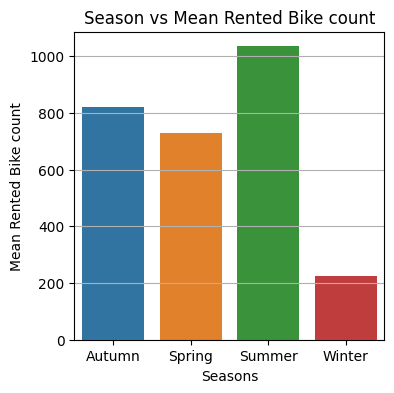

In [348]:
#plotting seasons vs mean rentals
plt.figure(figsize=(4,4))
plt.grid()
sns.barplot(season_rent,  x='Seasons', y='Rented Bike Count')
plt.ylabel("Mean Rented Bike count")
plt.title('Season vs Mean Rented Bike count')

* Highest Mean Rentals were observed during Summer.
* Lowest Rentals were observed in Winters. This might be due to high snowfall and subzero temperature in Seoul and also the holiday season during month of /december.

In [349]:
#dataframe for weekdays vs mean rentals
daywise_rent = data.groupby(by='day_of_week').agg({'Rented Bike Count':'mean'}).reset_index()


Text(0.5, 1.0, 'Day vs Mean Rented Bike count')

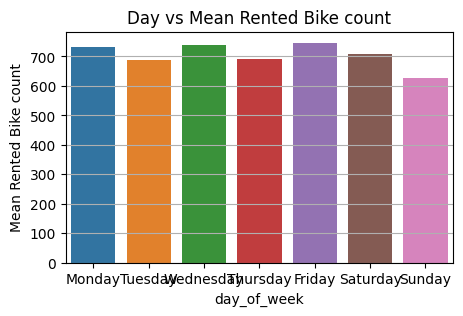

In [350]:
#plotting daywise mean rentals
order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(5,3))
plt.grid()
sns.barplot(daywise_rent, x='day_of_week', y='Rented Bike Count', order=order)
plt.ylabel("Mean Rented Bike count")
plt.title('Day vs Mean Rented Bike count')

Bike Rentals were fairly equal on all days with a decline in Rentals on Sundays.

In [351]:
# total rented bikes for each month
monthwise_rent = data.groupby(by='month').agg({'Rented Bike Count':'sum'}).reset_index()
monthwise_rent

,month,Rented Bike Count
0,April,524227
1,August,651887
2,December,185330
3,February,151833
4,January,150006
5,July,734460
6,June,896887
7,March,380594
8,May,707088
9,November,465715


Text(0.5, 1.0, 'Month vs Mean Rented Bike count')

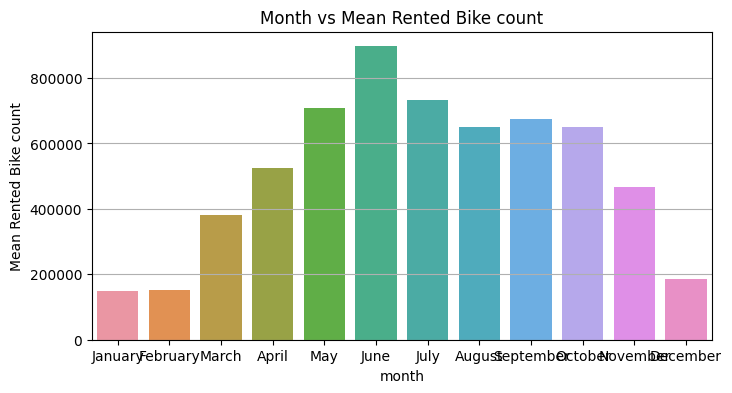

In [352]:
#plotting total rented bikes for each month
order = ['January','February','March', 'April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(8,4))
plt.grid()
sns.barplot(monthwise_rent, x='month', y='Rented Bike Count', order=order)
plt.ylabel("Mean Rented Bike count")
plt.title('Month vs Mean Rented Bike count')

**Observations -**
* Least Rentals were observed in the month of December, January and February i.e. during winter seasons.
* Highest Rentals were observed during the months of May, June, July i.e. during summer.

In [353]:
#hourwise mean rental bikes
hourwise_rent = data.groupby(by='Hour').agg({'Rented Bike Count':'mean'}).reset_index()

Text(0.5, 1.0, 'Hour vs Rented Bike count')

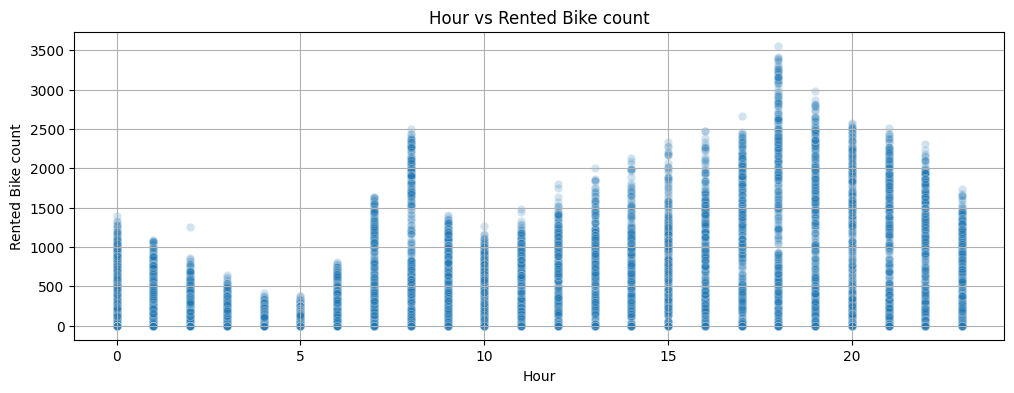

In [354]:
#scatterplot of hourwise mean rental bikes to understand distribution better
plt.figure(figsize=(12,4))
plt.grid()
sns.scatterplot(data, x='Hour', y='Rented Bike Count', alpha=0.2)
plt.ylabel("Rented Bike count")
plt.title('Hour vs Rented Bike count')

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count')

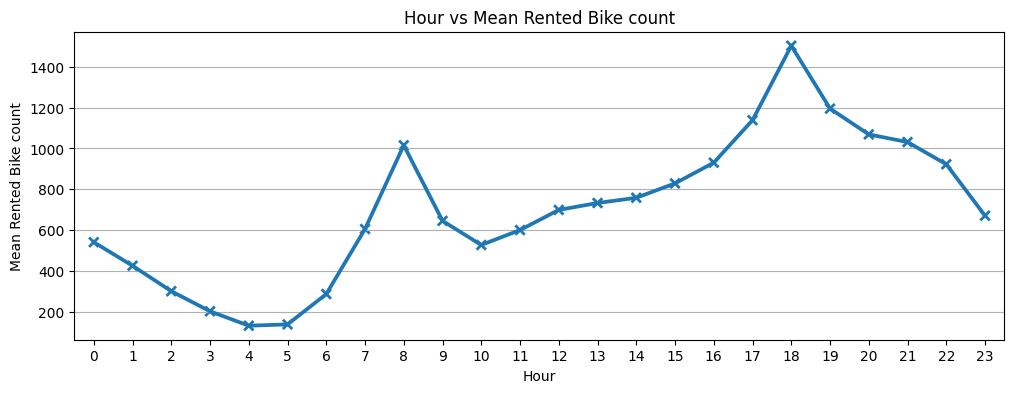

In [355]:
#lineplot of hourwise mean rental bikes 
plt.figure(figsize=(12,4))
plt.grid()
sns.pointplot(hourwise_rent, x='Hour', y='Rented Bike Count', markers='x')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count')

1. Demand of Bikes is minimum from Midnight to 6 A.M. 
2. Sharp increase in demand can be seen from 7 A.M. to 8 A.M. then declines. This might be due to office and school goers.
3. Steady increase in demand is witnessed from 11 AM till 4 PM.
4. Sudden spike in rentals is seen from 4 PM to 6 PM possibly indicating return of office goers.
5. Rental demand thereafter decreases steadily.

Text(0, 0.5, 'Rented Bikes')

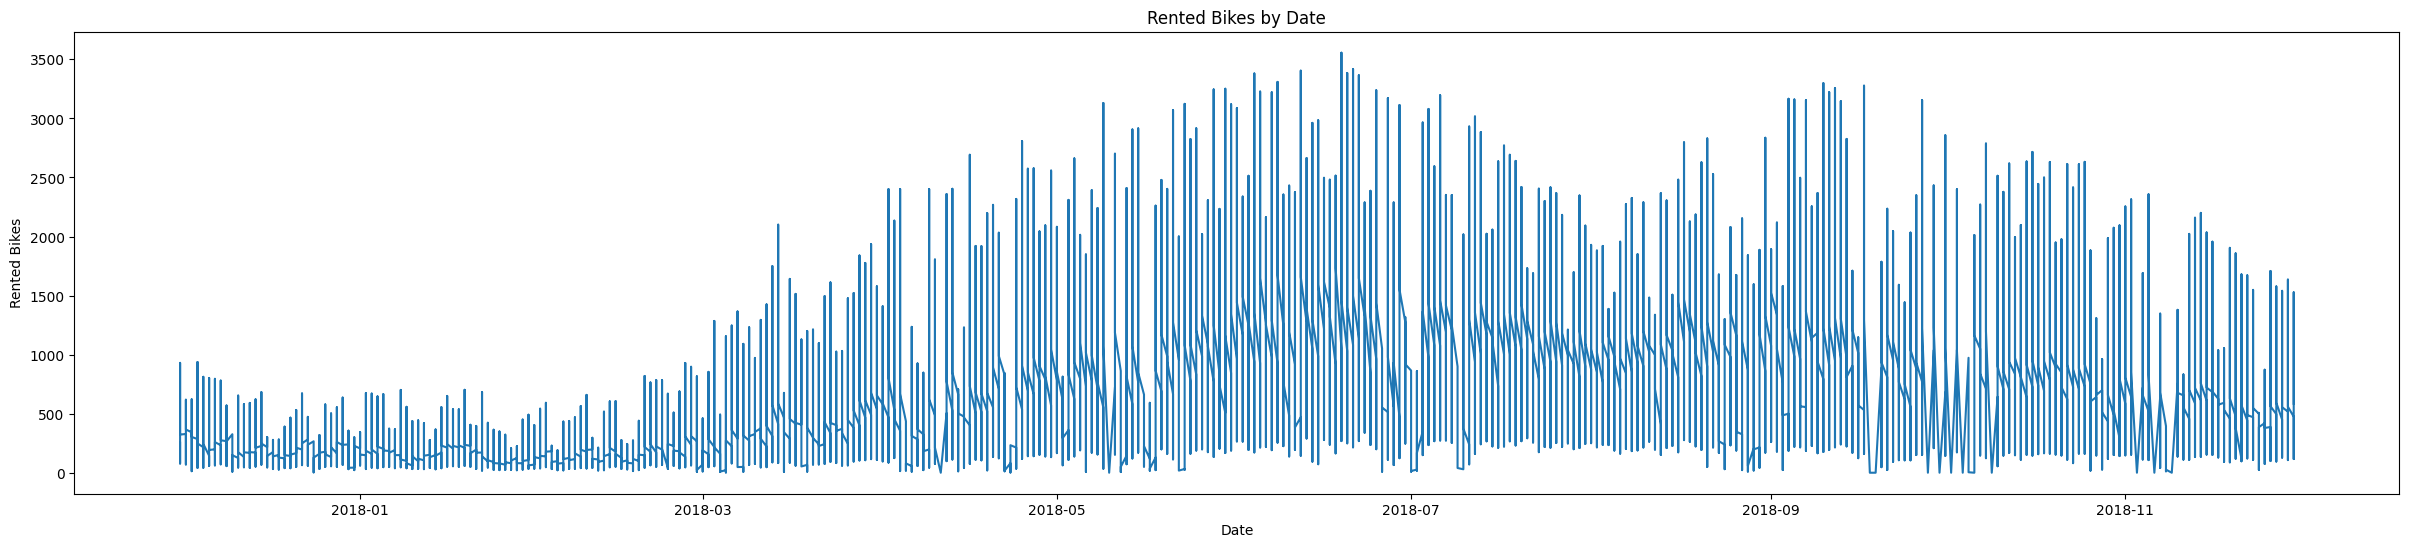

In [356]:
# Plotting the time series of given dataframe
plt.figure(figsize=(30,6))
plt.plot(data['Date'], data['Rented Bike Count'])
 
# Giving title to the chart using plt.title
plt.title('Rented Bikes by Date')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Rented Bikes')

* Rentals before 2018-03 were very less and increases thereafter.

* Decline can also be witnessed as the end of the year approaches.

This might be due to the effect of winter season as we had seen in previous graphs.

### **Multivariate Analysis**

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count vs days')

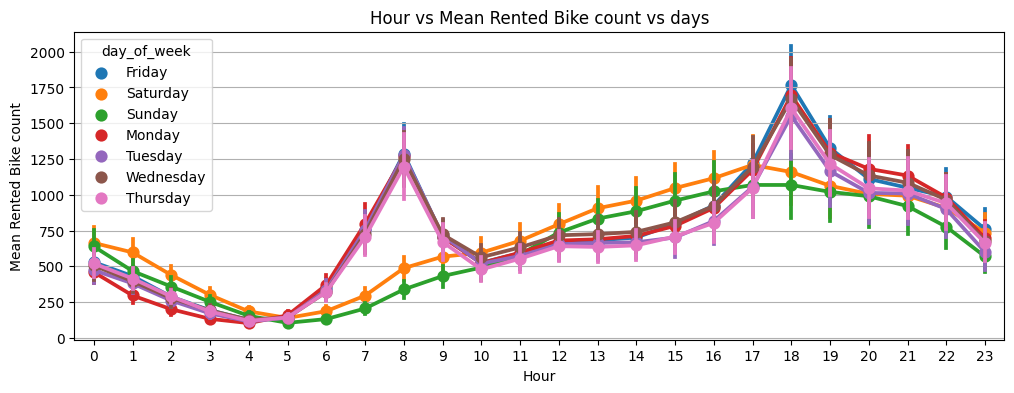

In [357]:
#plotting hourly variation on various days
plt.figure(figsize=(12,4))
plt.grid()
sns.pointplot(data, x='Hour', y='Rented Bike Count', markers='o', hue='day_of_week')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count vs days')

* Sudden spike is seen between 7-9 AM and 5-7 PM. This is due to the office goers and students.
* Rentals after midnight are more on weekends than weekdays. 
* Rentals during day is more on weekdays than weekends and sudden jump is also not witnessed during weekends. 

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count vs Seasons')

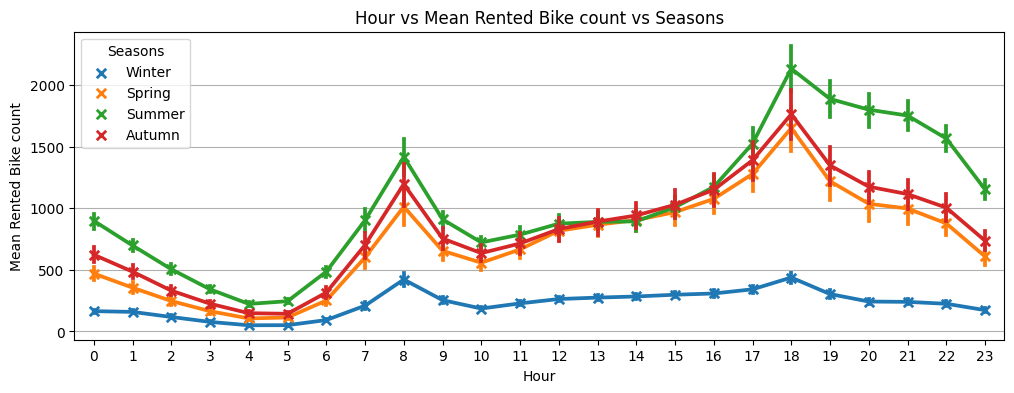

In [358]:
#plotting hourly variation of rentals in different seasons
plt.figure(figsize=(12,4))
plt.grid()
sns.pointplot(data, x='Hour', y='Rented Bike Count', markers='x', hue='Seasons')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count vs Seasons')

* Peak hours remain to be the same irrespective of the seasons.
* Winters have least numbers of rentals followed by Spring, Autumn and Summer respectively.
* Demand after 6 PM is marginally high during winters than other seasons.

<Axes: >

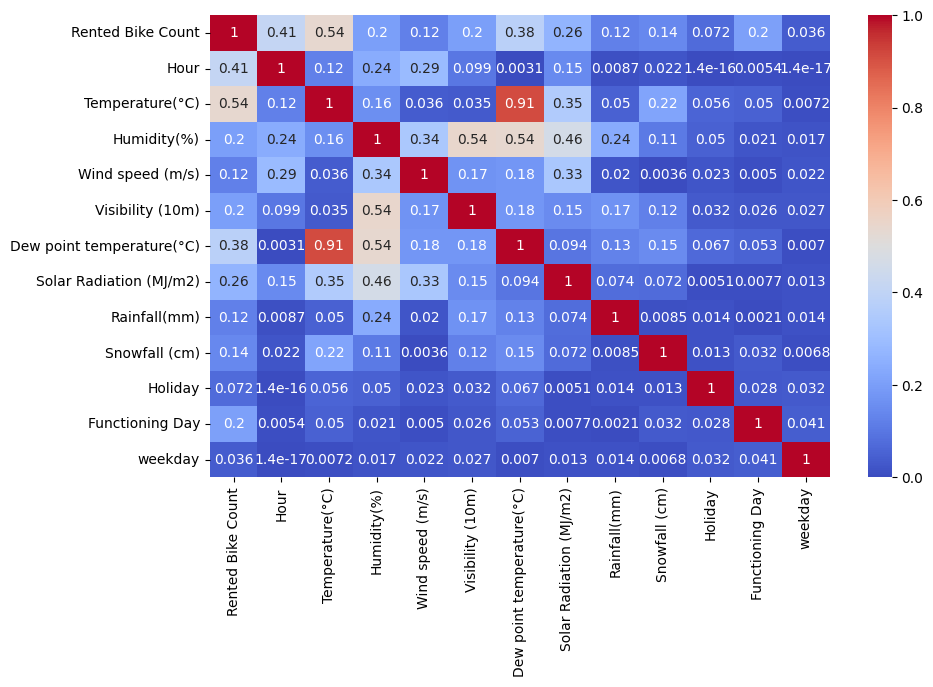

In [359]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(data.corr().abs(), annot=True,cmap='coolwarm')

From the heatmap we can say that -
Dew Point Temperature and Temperature are highly correalted thus one of them should be removed before applying linear regression.

## **Hypothesis Testing**

### **Hypothetical Statement - 1**
### The average number of bike rentals is different on weekends than on weekdays.

**Null Hypothesis** --> Average bike rentals is same on Weekend as well as Weekdays.

**Alternative Hypothesis** --> Average bike rentals is different on Weekend and Weekdays.

In [360]:
#split the data into two groups: one for weekdays and one for weekends
weekday_rentals = data.loc[data['weekday'], 'Rented Bike Count']
weekend_rentals = data.loc[~data['weekday'], 'Rented Bike Count']

In [361]:
#perform a two-sample z-test to compare the means of the two groups
t,p = ztest(weekday_rentals, weekend_rentals)

# Print the results
print('t-statistic:', t)
print('p-value:', p)

t-statistic: 3.415044819241552
p-value: 0.0006377151729642665


In [362]:
# Determine if the p-value is significant at the 5% level
if p < 0.05:
    print('Reject the null hypothesis:')
    print('The mean number of bike rentals is significantly different on weekends compared to weekdays.')
else:
    print('Fail to reject the null hypothesis:')
    print('There is not enough evidence to conclude that the mean number of bike rentals is significantly different on weekends compared to weekdays.')

Reject the null hypothesis:
The mean number of bike rentals is significantly different on weekends compared to weekdays.


### **Hypothetical Statement-2**

### There is a significant difference in the average number of bike rentals during different seasons.

**Null Hypothesis** --> Average number of bike rentals is same during different seasons.

**Alternative Hypothesis** --> Average number of bike rentals is different during different seasons.

In [363]:
# Separate the data into four groups (one for each season)
spring_rentals = data.loc[data['Seasons'] == 'Spring', 'Rented Bike Count']
summer_rentals = data.loc[data['Seasons'] == 'Summer', 'Rented Bike Count']
fall_rentals = data.loc[data['Seasons'] == 'Autumn', 'Rented Bike Count']
winter_rentals = data.loc[data['Seasons'] == 'Winter', 'Rented Bike Count']

In [364]:
# Perform an ANOVA test
f_statistic, p_value = f_oneway(spring_rentals, summer_rentals, fall_rentals, winter_rentals)

In [365]:
# Print the results
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 776.4678149879506
p-value: 0.0


In [366]:
# Determine if the p-value is significant at the 5% level
if p_value < 0.05:
    print('We reject the null hypothesis:')
    print('There is a significant difference in the average number of bike rentals during different seasons.')
else:
    print('We fail to reject the null hypothesis:')
    print('There is not enough evidence to conclude that there is a significant difference in the average number of bike rentals during different seasons.')

We reject the null hypothesis:
There is a significant difference in the average number of bike rentals during different seasons.


## **Feature Engineering & Data Pre-processing**

In [367]:
df=data.copy()

In [368]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True


### Handling Missing Values

There were no missing values in the given dataset.

### Handling Outliers

* There were no exceptional outliers present features of the dataset.

* Removing the apparent outliers in would result in loss of very important data.

### Feature Manipulation and Selection

In [369]:
model_df = df.drop(columns=['Date','Dew point temperature(°C)','weekday','year'])

In [370]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True


In [371]:

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [372]:
calc_vif(model_df[[i for i in model_df.describe().columns if i not in ['Rented Bike Count'] ]])

,variables,VIF
0,Hour,4.123293
1,Temperature(°C),3.371268
2,Humidity(%),11.141082
3,Wind speed (m/s),4.681143
4,Visibility (10m),6.534147
5,Solar Radiation (MJ/m2),2.428143
6,Rainfall(mm),1.082300
7,Snowfall (cm),1.121115
8,Holiday,1.055271
9,Functioning Day,18.709066


Let's only keep variables with VIF values upto 5.

In [373]:
model_df = model_df.drop(columns=['Functioning Day'])

In [374]:
calc_vif(model_df[[i for i in model_df.describe().columns if i not in ['Rented Bike Count'] ]])

,variables,VIF
0,Hour,3.922387
1,Temperature(°C),3.238208
2,Humidity(%),4.878319
3,Wind speed (m/s),4.610685
4,Visibility (10m),4.730979
5,Solar Radiation (MJ/m2),2.247281
6,Rainfall(mm),1.079201
7,Snowfall (cm),1.121043
8,Holiday,1.055235


### **Data Transformation**

In [375]:
model_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'day_of_week',
       'month'],
      dtype='object')

In [376]:
model_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,day_of_week,month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,0,Friday,December
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,0,Friday,December
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,0,Friday,December
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,0,Friday,December
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,0,Friday,December


In [377]:
numeric_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
        'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
        'Snowfall (cm)','Rented Bike Count']


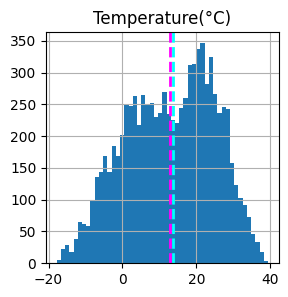

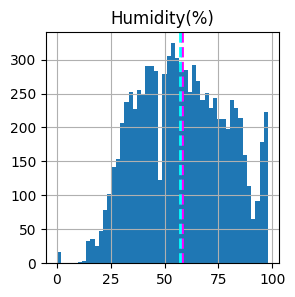

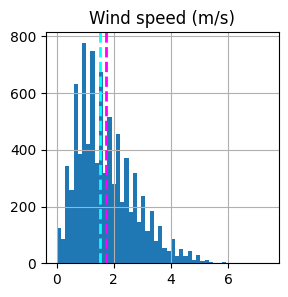

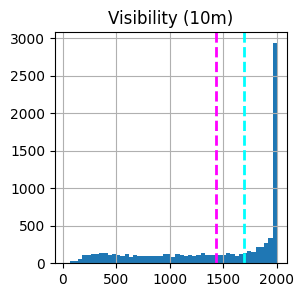

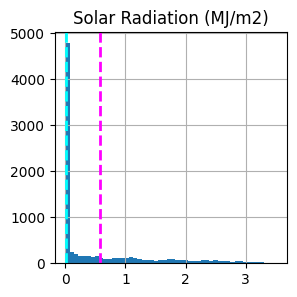

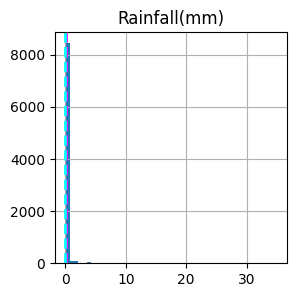

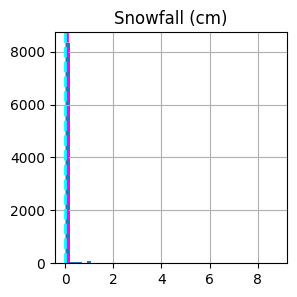

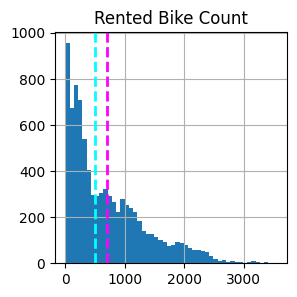

In [378]:
# distribution plot for each numerical feature count 

for col in numeric_features:
    fig = plt.figure(figsize=(3,3))
    ax = fig.gca()
    feature = model_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [379]:
model_df = pd.get_dummies(model_df, columns=['month','day_of_week','Hour','Seasons'], prefix=[None,None,'hour',None])

In [380]:
model_df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'Autumn', 'Spring', 'Summer',
       'Winter'],
      dtype='object')

### **Data Splitting**

In [381]:
independent_variables = [i for i in model_df.columns if i not in ['Rented Bike Count']]
print(independent_variables)
dependent_variable = 'Rented Bike Count'

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'Autumn', 'Spring', 'Summer', 'Winter']


In [382]:
# Create the data of independent variables
X = model_df[independent_variables].values

# Create the dependent variable data
y = model_df[dependent_variable].values

In [383]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

###**Data Scaling**

In [384]:
# Scaling data with MinMax Scaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **ML Model Implementation**

In [385]:
#Defining a function to analyse model performance on training set
def train_performance(y_train, y_pred_train):
  '''This function analyses various performance metrics of a model on training set.'''
  #Mean Squared error
  MSE  = mean_squared_error((y_train), (y_pred_train))
  print("MSE :" , MSE)

  #Root Mean Squared Error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #R2 score
  r2 = r2_score((y_train), (y_pred_train))
  print("R2 :" ,r2)

  #Adjusted R2 score
  print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))


In [386]:
#Defining a function to analyse model performance on test set
def test_performance(y_test, y_pred):
  '''This function analyses various performance metrics of a model on test set.'''
  #Mean Squared Error
  MSE  = mean_squared_error((y_test), (y_pred))
  print("MSE :" , MSE)

  #Root Mean Squared Eror
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #R2 score
  r2 = r2_score((y_test), (y_pred))
  print("R2 :" ,r2)

  #Adjusted R2 score
  print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [482]:
#Defining a funtion for visualization of results
def plot_predictions(y_test, y_pred):

  '''This function plots 50 random samples of target variable predictions vs actual values of target variable.''' 

  #Dataframe of actual vs predicted values
  predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

  #Random sampling from predictions dataframe and plotting
  predictions.sample(50).plot(kind='bar',figsize=(12,4))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.title('Actual and Predicted Bike Counts')
  plt.show()

In [483]:
#defining a function to visualize feature importance
features = [i for i in model_df.columns if i not in ['Rented Bike Count']]
def feature_importance(model):
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]
  #plotting
  plt.figure(figsize=(12,4))
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.xticks(rotation = 90)
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

### **Linear Regression**

In [484]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [485]:
#Predicting on Training set
y_pred_train = regressor.predict(X_train)

In [486]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

**Train Performance**

In [487]:
#Model Performance on training data
train_performance(y_train, y_pred_train)

MSE : 153214.68323701483
RMSE : 391.4264723252821
R2 : 0.6282998065234804
Adjusted R2 :  0.6253591404358496


**Test Performance**

In [488]:
#Model Performance on test data
test_performance(y_test, y_pred)

MSE : 145151.589255137
RMSE : 380.9876497409555
R2 : 0.6631842368349559
Adjusted R2 :  0.6522615558360895


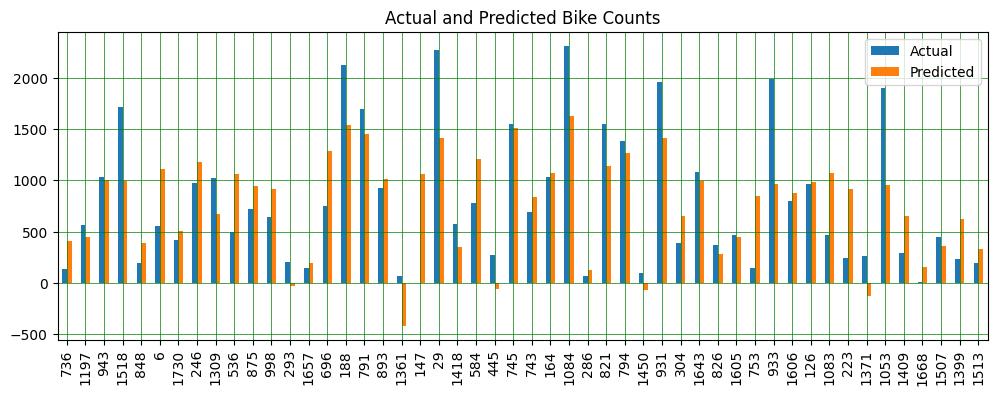

In [489]:
#Comparing predictions with actual values
plot_predictions(y_test, y_pred)

**Feature Importance**

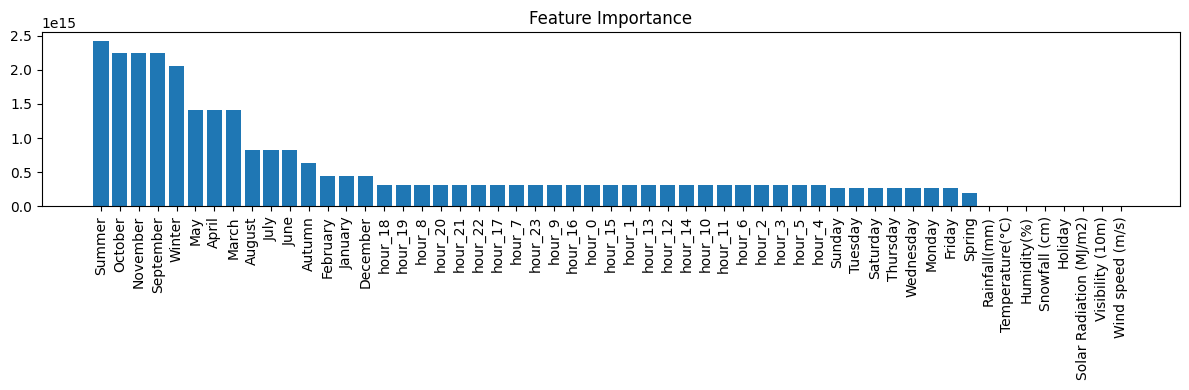

In [490]:
feature_importance(regressor)

### **Lasso Regression**

In [491]:
# importing lasso regressor
from sklearn.linear_model import Lasso

### Cross validation and GridSearchCV
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-10,1e-8,1e-4,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.01, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [492]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -155778.9989633434


In [493]:
y_pred_train = lasso_regressor.predict(X_train)

In [494]:
y_pred = lasso_regressor.predict(X_test)

**Train Performance**

In [495]:
#Model Performance on training data
train_performance(y_train, y_pred_train)

MSE : 153211.22655272385
RMSE : 391.4220568040639
R2 : 0.6283081924705227
Adjusted R2 :  0.6253675927274098


**Test Performance**

In [496]:
#Model Performance on test data
test_performance(y_test, y_pred)

MSE : 145138.7590819622
RMSE : 380.97081132543764
R2 : 0.6632140085005063
Adjusted R2 :  0.6522922929742845


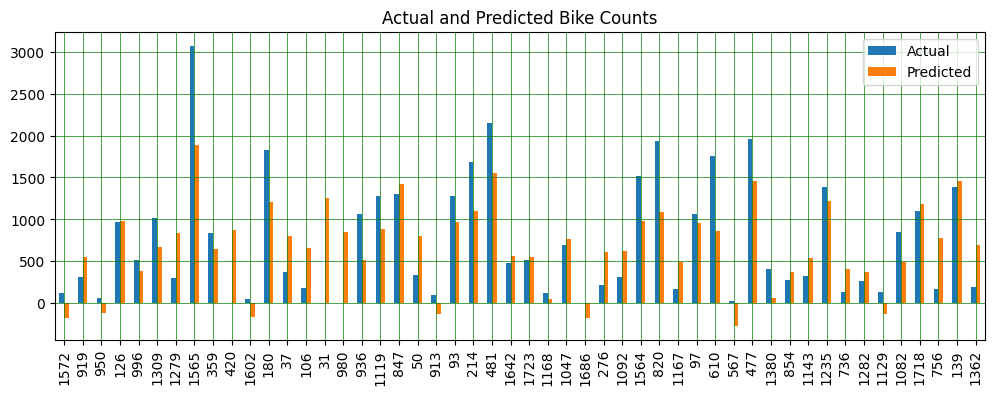

In [497]:
#Comparing predictions with actual values
plot_predictions(y_test, y_pred)

**Feature Importance**

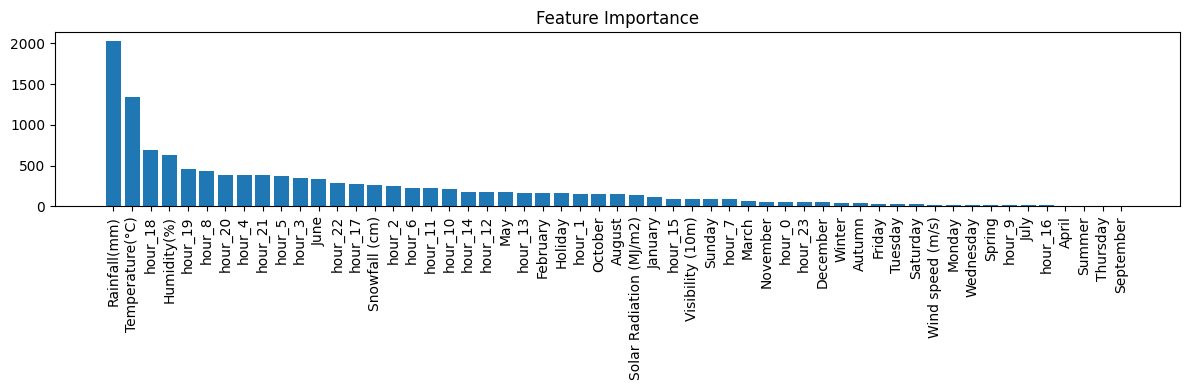

In [498]:
feature_importance(lasso_regressor.best_estimator_)

### **Decision Tree Regressor**

In [499]:
from sklearn.tree import DecisionTreeRegressor
dt_regression = DecisionTreeRegressor(splitter='best', min_samples_leaf=5)
dt_regression = dt_regression.fit(X_train, y_train)


In [500]:
y_pred_train = dt_regression.predict(X_train)

In [501]:
y_pred = dt_regression.predict(X_test)

**Train Performance**

In [502]:
#Model Performance on training data
train_performance(y_train, y_pred_train)

MSE : 45999.94633666965
RMSE : 214.47598079195174
R2 : 0.8884037182859318
Adjusted R2 :  0.8875208363103458


**Test Performance**

In [503]:
#Model Performance on test data
test_performance(y_test, y_pred)

MSE : 124702.6207193261
RMSE : 353.1325823530393
R2 : 0.7106348708836173
Adjusted R2 :  0.7012509781351497


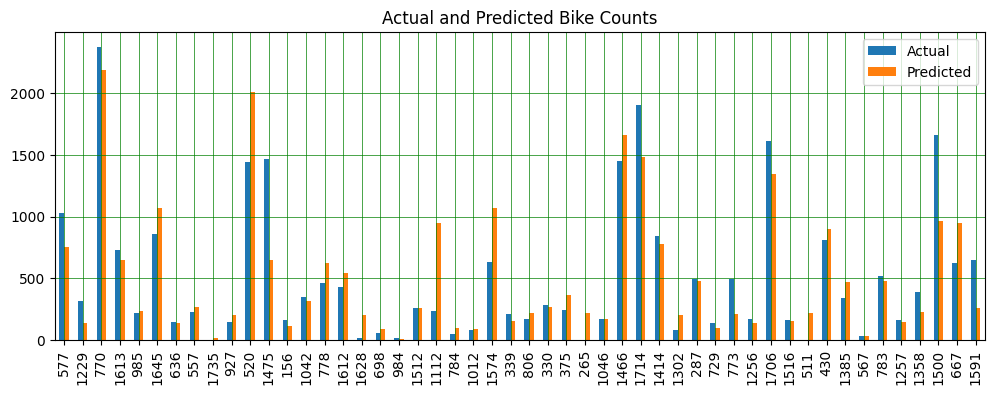

In [504]:
#Comparing predictions with actual values
plot_predictions(y_test, y_pred)

**Feature Importance**

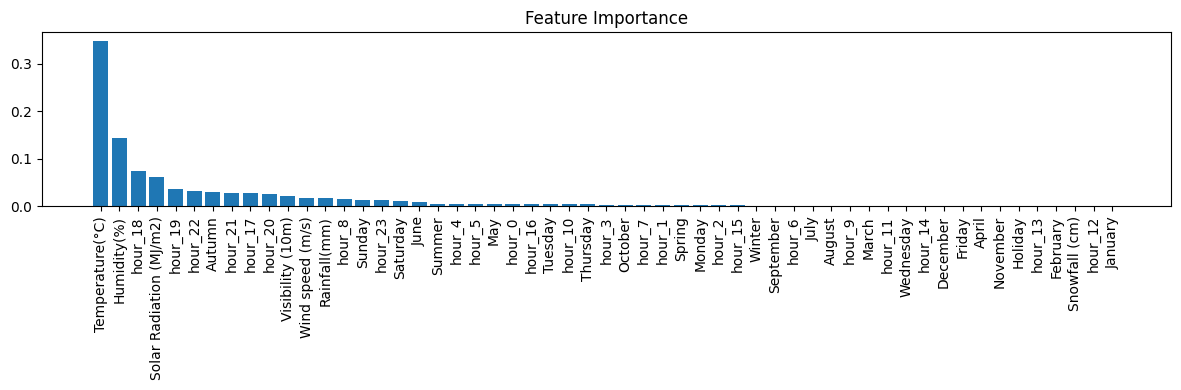

In [505]:
feature_importance(dt_regression)

### **Random Forest**

In [506]:
from sklearn.ensemble import RandomForestRegressor
ensemble_regressor = RandomForestRegressor()

In [507]:
ensemble_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [508]:
y_pred = ensemble_regressor.predict(X_test)

In [509]:
y_pred_train = ensemble_regressor.predict(X_train)

**Train Performance**

In [510]:
#Model Performance on training data
train_performance(y_train, y_pred_train)

MSE : 11061.562759446346
RMSE : 105.17396426609746
R2 : 0.9731645496960727
Adjusted R2 :  0.9729522439183518


**Test Performance**

In [511]:
#Model Performance on test data
test_performance(y_test, y_pred)

MSE : 75453.0801053653
RMSE : 274.68724052158905
R2 : 0.8249155459526434
Adjusted R2 :  0.8192376892470983


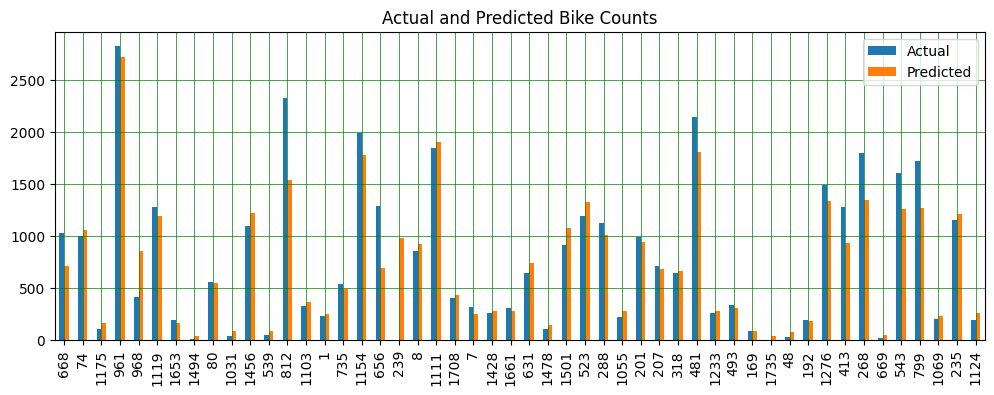

In [512]:
#Comparing predictions with actual values
plot_predictions(y_test, y_pred)

**Feature Importance**

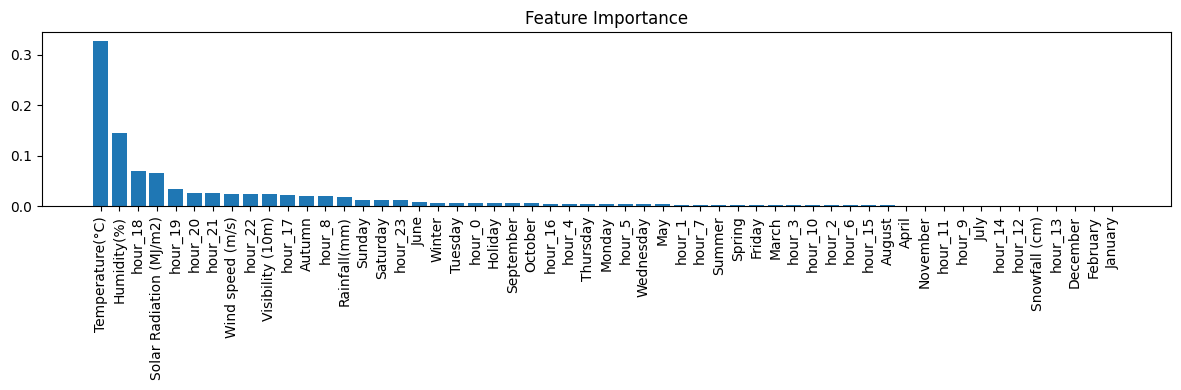

In [513]:
feature_importance(ensemble_regressor)

### **XGBoost**

In [514]:
import xgboost as xgb

dreg= xgb.XGBRegressor(booster= 'gbtree', max_leaves=5)
dreg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [515]:
y_pred = dreg.predict(X_test)

In [516]:
y_pred_train = dreg.predict(X_train)

**Train Performance**

In [517]:
#Model Performance on training data
train_performance(y_train, y_pred_train)

MSE : 13421.819235350311
RMSE : 115.85257543684693
R2 : 0.9674385463508806
Adjusted R2 :  0.9671809399137831


**Test Performance**

In [518]:
#Model Performance on test data
test_performance(y_test, y_pred)

MSE : 61619.636034787414
RMSE : 248.2330276872669
R2 : 0.8570152428677272
Adjusted R2 :  0.8523783551069519


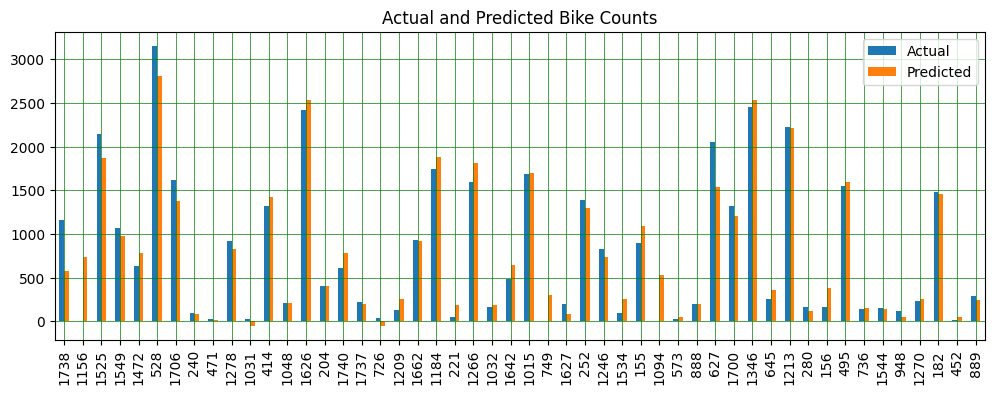

In [519]:
#Comparing predictions with actual values
plot_predictions(y_test, y_pred)

**Feature Importance**

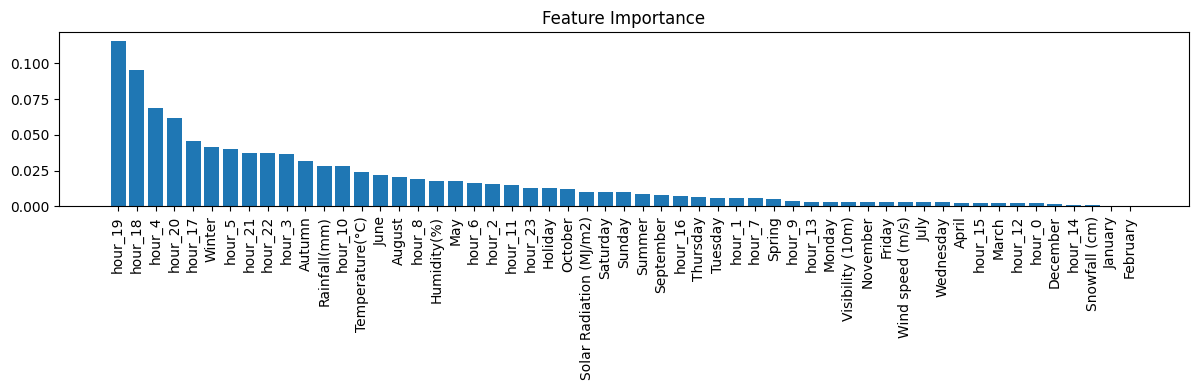

In [520]:
feature_importance(dreg)

### **GridSearchCV on XGBoost**

In [521]:
params = {"min_child_weight":[8,10,12], 
            'eta': [0.04,0.08], 
            'max_depth': [13,15],
            'importance_type': ['gain'],
            'max_leaves': [2]}

In [522]:
xgbr = xgb.XGBRegressor(booster= 'gbtree')

In [475]:

reg_gs = GridSearchCV(xgbr,scoring='neg_mean_squared_error',param_grid=params, verbose=1,cv=5)
reg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=No...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'eta': [0.04, 0.08], 'importance_type': ['gain'],
                         'max_depth': [13, 15], 'max_leaves': [2],
                         'min_child_weight': [8, 10, 12]},
             scoring='neg_mean_squared_error', verbose=1)

In [476]:
reg_optimal_model =reg_gs.best_estimator_

In [477]:
#Predictions on train and test data
y_pred_train = reg_optimal_model.predict(X_train)
y_pred = reg_optimal_model.predict(X_test)

**Train Performance**

In [478]:
#Model Performance on training data
train_performance(y_train, y_pred_train)

MSE : 10441.441923729157
RMSE : 102.18337400834422
R2 : 0.9746689683963244
Adjusted R2 :  0.9744685646652828


**Test Performance**

In [479]:
#Model Performance on test data
test_performance(y_test, y_pred)

MSE : 53706.299124184574
RMSE : 231.74619549020557
R2 : 0.8753776777842467
Adjusted R2 :  0.8713362699293726


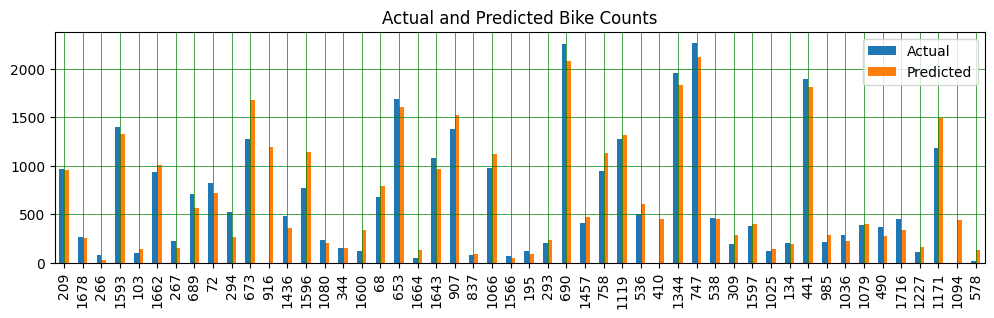

In [480]:
#Comparing predictions with actual values
plot_predictions(y_test, y_pred)

**Feature Importance**

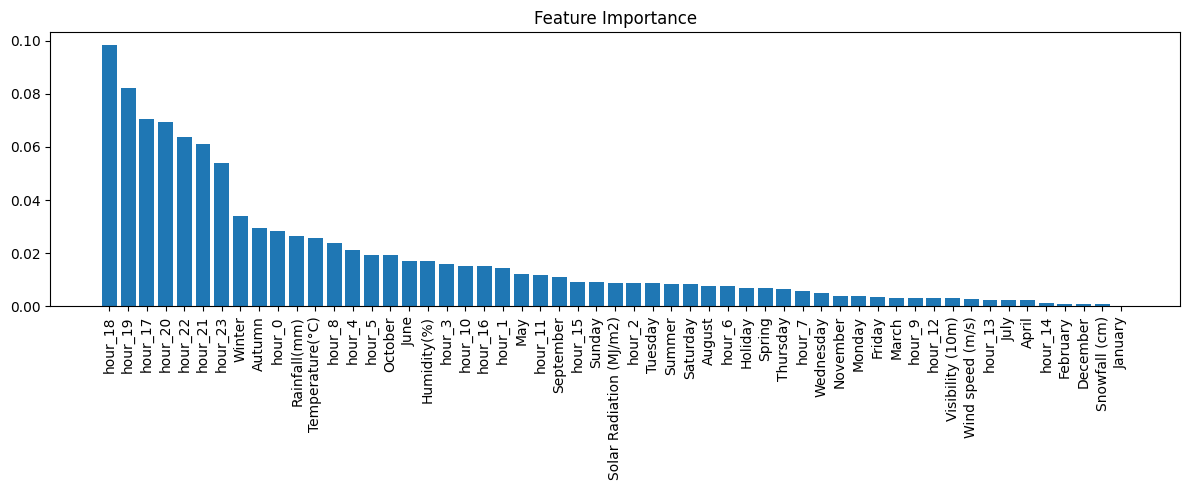

In [481]:
feature_importance(reg_optimal_model)

#**Conclusion**

* The Seoul Bike Sharing Demand Prediction Project aimed to develop a predictive model for the bike-sharing system in Seoul.

* The project utilized data on bike rentals, weather, and other relevant factors to create a machine learning model that could forecast the number of bikes rented on a given day.

* From The above results, we can see that **Linear** and **Lasso Regression** models have almost similar R2 score of 62% on training data and 66% on test data.


* In case of **Decision Tree Regression** model, we got a R2 score of 88% on training data and 71% on test data.

* For **Random Forest Regression** model, we got a R2 score of 97% on training data and 82% on test data.

* For **XGBoost Regression** model, without hyperparameter tuning we got r2 score of 96% on training data and 85% on test data.

* For **XGBoost Regression** model, after **hyperparameter tuning** we got best performance with an r2 score of 97% on training data and 87% on test data.

* This model can help the city government allocate resources more efficiently, reducing waste and making the bike-sharing system more sustainable.